In [ ]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import tensorflow.keras as tfk
tfkl=tfk.layers
import tensorflow_probability as tfp
tfpl=tfp.layers
tfd=tfp.distributions
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten,MaxPool2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib as plt
%matplotlib inline

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
num_base_filters=32
l2_reg=1e-4  #1e-4
dropout_rate=0.20  #0.15 for case3  ## for MC-Dropout
learning_rate=1e-4
bs=64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(vertical_flip=True,
                             brightness_range=[1.0,1.25])

In [ ]:
def function():
  import glob
  import os
  files=glob.glob("/content/drive/My Drive/Cropped/*")
  import pandas as pd
  import cv2
  import numpy as np
  label=pd.read_csv("/content/train.csv")
  count=1
  for file in files:
    print(count)
    im=cv2.imread(file)
    name=str(file)
    name=name.split("/")
    name=name[len(name)-1]
    name=name.split(".")
    name=name[0]
    dim=(224,224)
    resized=cv2.resize(im,dim)
    lbl=label.loc[label['id_code'] == name, 'diagnosis']
    lbl=str(lbl).split()
    lbl=int(lbl[1])
    if lbl==0:
      count+=1
      path="/content/drive/My Drive/Multi-Output/0"
      cv2.imwrite(os.path.join(path , name+'.png'), resized)
      x=cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
      x=np.expand_dims(x,axis=0)
      for y, val in zip(datagen.flow(x,save_to_dir="/content/drive/My Drive/Multi-Output/0",
                                     save_prefix=name+'_aug',save_format='png'),range(1)):
        pass
    elif lbl==1:
      count+=1
      path="/content/drive/My Drive/Multi-Output/1"
      cv2.imwrite(os.path.join(path , name+'.png'), resized)
      x=cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
      x=np.expand_dims(x,axis=0)
      for y, val in zip(datagen.flow(x,save_to_dir="/content/drive/My Drive/Multi-Output/1",
                                     save_prefix=name+'_aug',save_format='png'),range(4)):
        pass
    elif lbl==2:
      count+=1
      path="/content/drive/My Drive/Multi-Output/2"
      cv2.imwrite(os.path.join(path , name+'.png'), resized)
      x=cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
      x=np.expand_dims(x,axis=0)
      for y, val in zip(datagen.flow(x,save_to_dir="/content/drive/My Drive/Multi-Output/2",
                                     save_prefix=name+'_aug',save_format='png'),range(1)):
        pass
    elif lbl==3:
      count+=1
      path="/content/drive/My Drive/Multi-Output/3"
      cv2.imwrite(os.path.join(path , name+'.png'), resized)
      x=cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
      x=np.expand_dims(x,axis=0)
      for y, val in zip(datagen.flow(x,save_to_dir="/content/drive/My Drive/Multi-Output/3",
                                     save_prefix=name+'_aug',save_format='png'),range(3)):
        pass
    elif lbl==4:
      count+=1
      path="/content/drive/My Drive/Multi-Output/4"
      cv2.imwrite(os.path.join(path , name+'.png'), resized)
      x=cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
      x=np.expand_dims(x,axis=0)
      for y, val in zip(datagen.flow(x,save_to_dir="/content/drive/My Drive/Multi-Output/4",
                                     save_prefix=name+'_aug',save_format='png'),range(2)):
        pass
  return

In [ ]:
#function()

In [ ]:
import glob
print(len(glob.glob("/content/drive/My Drive/Multi-Output/0/*")))
print(len(glob.glob("/content/drive/My Drive/Multi-Output/1/*")))
print(len(glob.glob("/content/drive/My Drive/Multi-Output/2/*")))
print(len(glob.glob("/content/drive/My Drive/Multi-Output/3/*")))
print(len(glob.glob("/content/drive/My Drive/Multi-Output/4/*")))

5414
2220
2997
964
1180


In [ ]:
'''
!pip install split-folders tqdm
import splitfolders
input="/content/drive/My Drive/Multi-Output"
op="/content/drive/My Drive/Multiclass Dataset New"
splitfolders.ratio(input, output=op, seed=1337, ratio=(.70, .15, .15), group_prefix=None) # default values
'''

'\n!pip install split-folders tqdm\nimport splitfolders\ninput="/content/drive/My Drive/Multi-Output"\nop="/content/drive/My Drive/Multiclass Dataset New"\nsplitfolders.ratio(input, output=op, seed=1337, ratio=(.70, .15, .15), group_prefix=None) # default values\n'

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
tr_datagen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
path_tr='/content/drive/My Drive/Multiclass Dataset New/train'
train_generator = tr_datagen.flow_from_directory(
        path_tr,
        target_size=(224, 224),
        batch_size=bs,
        class_mode='categorical')

Found 8940 images belonging to 5 classes.


In [ ]:
print(len(glob.glob("/content/drive/My Drive/Multiclass Dataset New/train/0/*")))
print(len(glob.glob("/content/drive/My Drive/Multiclass Dataset New/train/1/*")))
print(len(glob.glob("/content/drive/My Drive/Multiclass Dataset New/train/2/*")))
print(len(glob.glob("/content/drive/My Drive/Multiclass Dataset New/train/3/*")))
print(len(glob.glob("/content/drive/My Drive/Multiclass Dataset New/train/4/*")))

3789
1554
2097
674
826


In [ ]:
y_orig=[]
for i in range(0,3789):
  y_orig.append(0)
for i in range(0,1554):
  y_orig.append(1)
for i in range(0,2097):
  y_orig.append(2)
for i in range(0,674):
  y_orig.append(3)
for i in range(0,826):
  y_orig.append(4)
y_orig=np.array(y_orig)

In [ ]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced'
                                               ,np.unique(y_orig)
                                               ,y_orig)

In [ ]:
print(class_weight)

[0.47189232 1.15057915 0.85264664 2.65281899 2.16464891]


In [ ]:
path_val='/content/drive/My Drive/Multiclass Dataset New/val'
val_datagen = ImageDataGenerator(rescale=1/255.0)
val_generator = val_datagen.flow_from_directory(
        path_val,
        target_size=(224, 224),
        batch_size=bs,
        class_mode='categorical')

Found 1915 images belonging to 5 classes.


In [ ]:
inputs=tfkl.Input((224,224,3))
#Block1
x=tfkl.Conv2D(filters=num_base_filters,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(inputs)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.MaxPooling2D(pool_size=3, strides=(2, 2), padding="same")(x)
#Block2
x=tfkl.Conv2D(filters=num_base_filters*2,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters*2,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.MaxPooling2D(pool_size=3, strides=(2, 2), padding="same")(x)
#Block3
x=tfkl.Conv2D(filters=num_base_filters*4,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters*4,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.MaxPooling2D(pool_size=3, strides=(2, 2), padding="same")(x)
# Block 4
x=tfkl.Conv2D(filters=num_base_filters*8,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters*8,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters*8,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.MaxPooling2D(pool_size=5, strides=(3, 3), padding="same")(x)
# Block 5
x=tfkl.Conv2D(filters=num_base_filters*8,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters*8,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Conv2D(filters=num_base_filters*8,kernel_size=3,strides=(1, 1),padding="same",kernel_regularizer=tfk.regularizers.l2(l2_reg))(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(dropout_rate)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.MaxPooling2D(pool_size=5, strides=(3, 3), padding="same")(x)
#x=tfkl.Lambda(lambda y: tfk.backend.concatenate([tfkl.GlobalAvgPool2D()(y),tfkl.GlobalMaxPool2D()(y)], axis=1))(x)
x=tfkl.Flatten()(x)
# Fully-connected
x=tfkl.Dense(2048)(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(0.5)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Dense(512)(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(0.5)(x,training=True)
x=tfkl.BatchNormalization()(x)
x=tfkl.Dense(128)(x)
x=tfkl.LeakyReLU()(x)
x=tfkl.Dropout(0.2)(x,training=True)
x=tfkl.BatchNormalization()(x)
outputs=tfkl.Dense(5,activation='softmax')(x)
model=Model(inputs, outputs)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 224, 224, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 224, 224, 32)     

In [ ]:
#model.load_weights("/content/drive/My Drive/Results_Multi-Class/best_model_multi_class.h5")

In [ ]:
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Nadam
opt=Adam(learning_rate=learning_rate,beta_1=0.9,beta_2=0.99)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=0,patience=30)
#mc = ModelCheckpoint('/content/drive/My Drive/best_model_multi_class_02.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

In [ ]:
class_weight={0: 0.47189232,
              1: 1.15057915,
              2: 0.85264664,
              3: 2.65281899,
              4: 2.16464891}

In [ ]:
def focal_loss(gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)
    def focal_loss_fixed(y_true, y_pred):
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)
        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.log(model_out))
        weight = tf.multiply(y_true, tf.pow(tf.subtract(1., model_out), gamma))
        fl = tf.multiply(alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)
    return focal_loss_fixed

In [ ]:
history= model.fit(train_generator,validation_data=val_generator,validation_steps=1,shuffle=True,epochs=80,verbose=1,class_weight=class_weight)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/80
140/140 [==============================] - 51s 362ms/step - loss: 2.0689 - accuracy: 0.3167 - val_loss: 3.8683 - val_accuracy: 0.0781
Epoch 2/80
140/140 [==============================] - 50s 354ms/step - loss: 1.6437 - accuracy: 0.4893 - val_loss: 4.1177 - val_accuracy: 0.1875
Epoch 3/80
140/140 [==============================] - 50s 354ms/step - loss: 1.5321 - accuracy: 0.5179 - val_loss: 3.3765 - val_accuracy: 0.2031
Epoch 4/80
140/140 [==============================] - 50s 354ms/step - loss: 1.4714 - accuracy: 0.5364 - val_loss: 3.1862 - val_accuracy: 0.1406
Epoch 5/80
140/140 [==============================] - 50s 354ms/step - loss: 1.4339 - accuracy: 0.5589 - val_loss: 1.6213 - val_accuracy: 0.4062
Epoch 6/80
140/140 [==============================] - 50s 354ms/step - loss: 1.3936 - accuracy: 0.5767 - val_loss: 1.5841 - val_accuracy: 0.5781
Epoch 7/80
140/140 [==============================] - 50s 355ms/step - loss: 1.3805 - accuracy: 0.5784 - val_loss: 1.3205 - val_ac

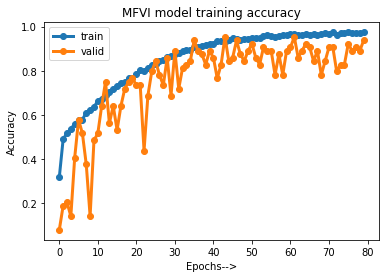

In [ ]:
import matplotlib.pyplot as plt
#####Training Accuracy########"
plt.plot(history.history['accuracy'],marker='o',linewidth=3)
tra_accu=np.array(history.history['accuracy'])
np.save("mfvi_tr_accu.npy",tra_accu)
plt.plot(history.history['val_accuracy'],marker='o',linewidth=3)
#val_accu=np.array(history.history['val_accuracy'])
#np.save("mfvi_tr_accu.npy",tra_accu)
plt.title('MFVI model training accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs-->')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

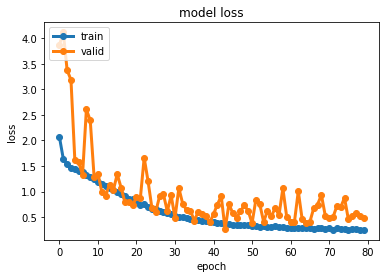

In [ ]:
plt.plot(history.history['loss'],marker='o',linewidth=3)
plt.plot(history.history['val_loss'],marker='o',linewidth=3)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
np.save("tr_accu_mcdp_multi-class-upd-ce.npy",history.history['accuracy'])
np.save("val_accu_mcdp_multi-class-upd-ce.npy",history.history['val_accuracy'])
np.save("tr_loss_mcdp_multi-class-upd-ce.npy",history.history['loss'])
np.save("val_losss_mcdp_multi-class-upd-ce.npy",history.history['val_loss'])

In [ ]:
model.save_weights('/content/drive/My Drive/best_model_multi_class_ce.h5')

In [ ]:
path_val='/content/drive/My Drive/Multiclass Dataset New/test'
val_datagen = ImageDataGenerator(rescale=1/255.0)
val_generator = val_datagen.flow_from_directory(
        path_val,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        shuffle=False)

Found 1920 images belonging to 5 classes.


In [ ]:
print(len(glob.glob('/content/drive/My Drive/Multiclass Dataset New/test/4/*')))

177


In [ ]:
num_of_test_samples=1920
batch_size=64

In [ ]:
Y_pred = model.predict(val_generator, num_of_test_samples // batch_size+1)
print(Y_pred.shape)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


(1920, 5)


In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

Confusion Matrix
[[795   9   7   0   2]
 [ 13 298  17   3   2]
 [  3  16 399  17  16]
 [  0   0   9 130   7]
 [  1   2  27  11 136]]


In [ ]:
from sklearn.metrics import classification_report
print('Classification Report')
target_names = ['0', '1','2','3','4']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       813
           1       0.92      0.89      0.91       333
           2       0.87      0.88      0.88       451
           3       0.81      0.89      0.85       146
           4       0.83      0.77      0.80       177

    accuracy                           0.92      1920
   macro avg       0.88      0.88      0.88      1920
weighted avg       0.92      0.92      0.92      1920

